In [1]:
import pandas as pd

from sklearn import datasets
from sklearn import linear_model

from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import r2_score

from IPython.core.display import Image, HTML

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wine = pd.read_csv('/Users/michael/DSI-projects/week03/4.1-regression-challenge/class_wine_data.csv')
test = pd.read_csv('/Users/michael/DSI-projects/week03/4.1-regression-challenge/blinded_test.csv')
winetest = pd.concat([wine,test])

In [3]:
wine=wine.drop('type',1)

In [4]:
wine=wine.drop('Unnamed: 0',1)

In [6]:
wine=wine.drop('fixed acidity',1)

In [7]:
wine=wine.drop('volatile acidity',1)

In [8]:
wine=wine.drop('citric acid',1)

In [9]:
wine=wine.drop('chlorides',1)

In [10]:
wine=wine.drop('free sulfur dioxide',1)

In [84]:
wine1=wine

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [6]:
df_X = pd.DataFrame(wine, columns=wine.columns)
df_Y = wine['quality']

In [7]:
df_X = df_X.drop('quality',1)

In [8]:
X = df_X.loc[:, :]
y = df_Y

In [9]:
X.shape

(4827, 11)

In [10]:
y.shape

(4827,)

In [11]:
lr = linear_model.LinearRegression()

In [12]:
lr_model = lr.fit(X, y)

In [13]:
lr_r2 =  r2_score(y_true=y, y_pred=lr_model.predict(X))

In [14]:
lr_r2

0.28119713768409238

In [15]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.6)

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

       X Shape  Y Shape
Train (1930, 11) (1930,)
Test  (2897, 11) (2897,)


Score: 0.27496779667


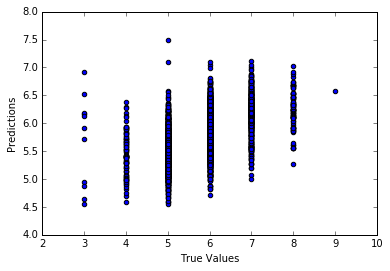

In [16]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test) 

Cross-validated scores: [ 0.19059373  0.24216293  0.29280453  0.26363752  0.19415715  0.34527185]
Cross-Predicted R^2: 0.261838114742


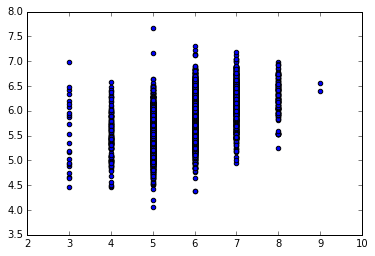

In [17]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df_X, df_Y, cv=6)
print "Cross-validated scores:", scores

# Make cross validated predictions
predictions = cross_val_predict(model, df_X, df_Y, cv=6)
plt.scatter(df_Y, predictions)
r2_s = r2_score(df_Y, predictions)
print "Cross-Predicted R^2:", r2_s

In [47]:
cross_val_score(lm, X, y, n_jobs=1, cv=5)

array([ 0.20058014,  0.2326965 ,  0.30536066,  0.18631823,  0.19280473])

In [50]:
cross_val_score(lm, X, y, n_jobs=1, cv=5).mean()

0.22355205075450818

In [18]:
cross_val_score(lr, X, y, n_jobs=1, cv=5,
                scoring='mean_squared_error')

array([-0.70921985, -0.57999627, -0.56942936, -0.51751696, -0.50575784])

In [19]:
cross_val_score(lr, X, y, n_jobs=1, cv=5,
                scoring='mean_squared_error').mean()

-0.57638405649187929

In [20]:
rcv = linear_model.RidgeCV(alphas=
                           (.001, .001, .01, .1, .5, 1, 5, 10),
                           store_cv_values=True)

In [21]:
rcv_model = rcv.fit(X, y)

In [22]:
rcv_r2 =  r2_score(y_true=y, y_pred=rcv_model.predict(X))

In [23]:
rcv_r2

0.28106000068904347

In [42]:
test = test.drop('type',1)

In [43]:
model.predict(test)

ValueError: shapes (1670,12) and (11,) not aligned: 12 (dim 1) != 11 (dim 0)

In [24]:
rcv_model.alpha_

0.001

In [25]:
len(rcv_model.coef_)

11

In [26]:
abs(rcv_model.coef_).mean()

3.7030176972326121

In [27]:
rcv_model.cv_values_.shape

(4827, 8)

In [28]:
rcv_model.cv_values_

array([[  4.96046471e-01,   4.96046471e-01,   4.79652920e-01, ...,
          4.75104471e-01,   4.78789663e-01,   4.80937278e-01],
       [  9.55451635e-02,   9.55451635e-02,   9.49743605e-02, ...,
          9.30162552e-02,   9.06921558e-02,   9.01752419e-02],
       [  9.55451635e-02,   9.55451635e-02,   9.49743605e-02, ...,
          9.30162552e-02,   9.06921558e-02,   9.01752419e-02],
       ..., 
       [  2.14281095e-03,   2.14281095e-03,   6.52920102e-05, ...,
          4.58046633e-05,   1.48546995e-05,   5.82680978e-07],
       [  2.97428143e-01,   2.97428143e-01,   2.92714090e-01, ...,
          2.90721439e-01,   2.95349490e-01,   3.03189447e-01],
       [  6.36669575e-03,   6.36669575e-03,   1.62469354e-02, ...,
          2.14516203e-02,   2.09257856e-02,   2.01359036e-02]])

In [38]:
cvp_lr_preds = cross_val_predict(lr, test, y, cv=5)

ValueError: Found arrays with inconsistent numbers of samples: [1670 4827]

In [39]:
cvp_lr_preds.shape

(4827,)

In [31]:
cvp_lr_preds

array([ 5.21435333,  5.63227016,  5.63227016, ...,  5.75715735,
        5.41645911,  5.9327748 ])

In [32]:
cvp_rcv_preds = cross_val_predict(rcv_model, X, y, cv=5)

In [33]:
cvp_rcv_preds.shape

(4827,)

In [34]:
cvp_rcv_preds

array([ 5.21816669,  5.63243663,  5.63243663, ...,  5.82348858,
        5.43462933,  6.00414863])

In [35]:
cvp_lr_r2 =  r2_score(y_true=y, y_pred=cvp_lr_preds)
cvp_lr_r2

0.24439331909068307

In [36]:
cvp_rcv_r2 =  r2_score(y_true=y, y_pred=cvp_rcv_preds)
cvp_rcv_r2

0.24827590394298371